Benny Cohen

6/7/2020


DAV Module 3 Assignment

In this notebook we will be exploring a dataset about wines given to us as part of the DAV 6150 course at the Katz School.
We will prepare the data for input to a machine learning model.

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
username = 'cohenb51'
path = 'Katz_School/master/DAV6150/m3/M3_Data.csv'
df = pd.read_csv(f'https://raw.githubusercontent.com/{username}/{path}')

In [116]:
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


Each row describes stats about a specific wine. We will look at each feature individually.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
INDEX                 12795 non-null int64
TARGET                12795 non-null int64
FixedAcidity          12795 non-null float64
VolatileAcidity       12795 non-null float64
CitricAcid            12795 non-null float64
ResidualSugar         12179 non-null float64
Chlorides             12157 non-null float64
FreeSulfurDioxide     12148 non-null float64
TotalSulfurDioxide    12113 non-null float64
Density               12795 non-null float64
pH                    12400 non-null float64
Sulphates             11585 non-null float64
Alcohol               12142 non-null float64
LabelAppeal           12795 non-null int64
AcidIndex             12795 non-null int64
STARS                 9436 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.6 MB


We see that we have 12795 rows. Many of them contain null values. Also, they are all numeric (float, and int64). The int values are discrete and probably categorical variables.  

In [118]:
df.isnull().sum(axis=0).sum()/12795

0.6408753419304416

64 percent of our data has at least 1 null in each row! We aren't going to be able to just drop the rows with nulls.

Let's try to see what the distribution of nulls are.

In [119]:
df.isnull().sum(axis=0)/len(df)

INDEX                 0.000000
TARGET                0.000000
FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
ResidualSugar         0.048144
Chlorides             0.049863
FreeSulfurDioxide     0.050567
TotalSulfurDioxide    0.053302
Density               0.000000
pH                    0.030871
Sulphates             0.094568
Alcohol               0.051036
LabelAppeal           0.000000
AcidIndex             0.000000
STARS                 0.262524
dtype: float64

We see that most of the columns with null values are around 5 percent. The content of sulphates is high at around .09 percent. STARS (the rating each wine is given) is very high at 26 percent. Let's see if there are any columns that tend to be null at the same time. We can do this with a heatmap. 

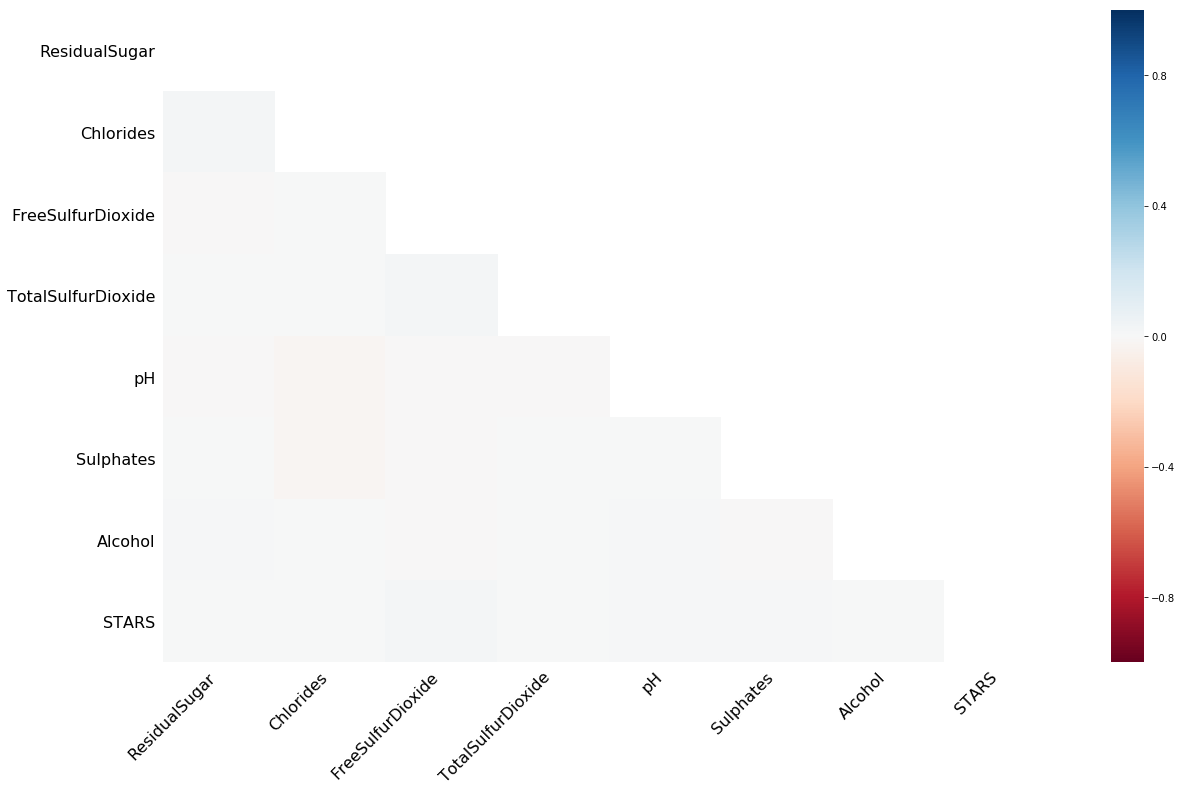

In [121]:
import missingno as msno
msno.heatmap(df) 

We read the graph as follows. On both the x axis and the y axis we have columns from our dataset. The color at the place where x and y meet measures how strongly the presence of x affects the presence of y. We see that there is no strong relationship as the graph is mainly white.

Here is a way to look at the patterns of nulls

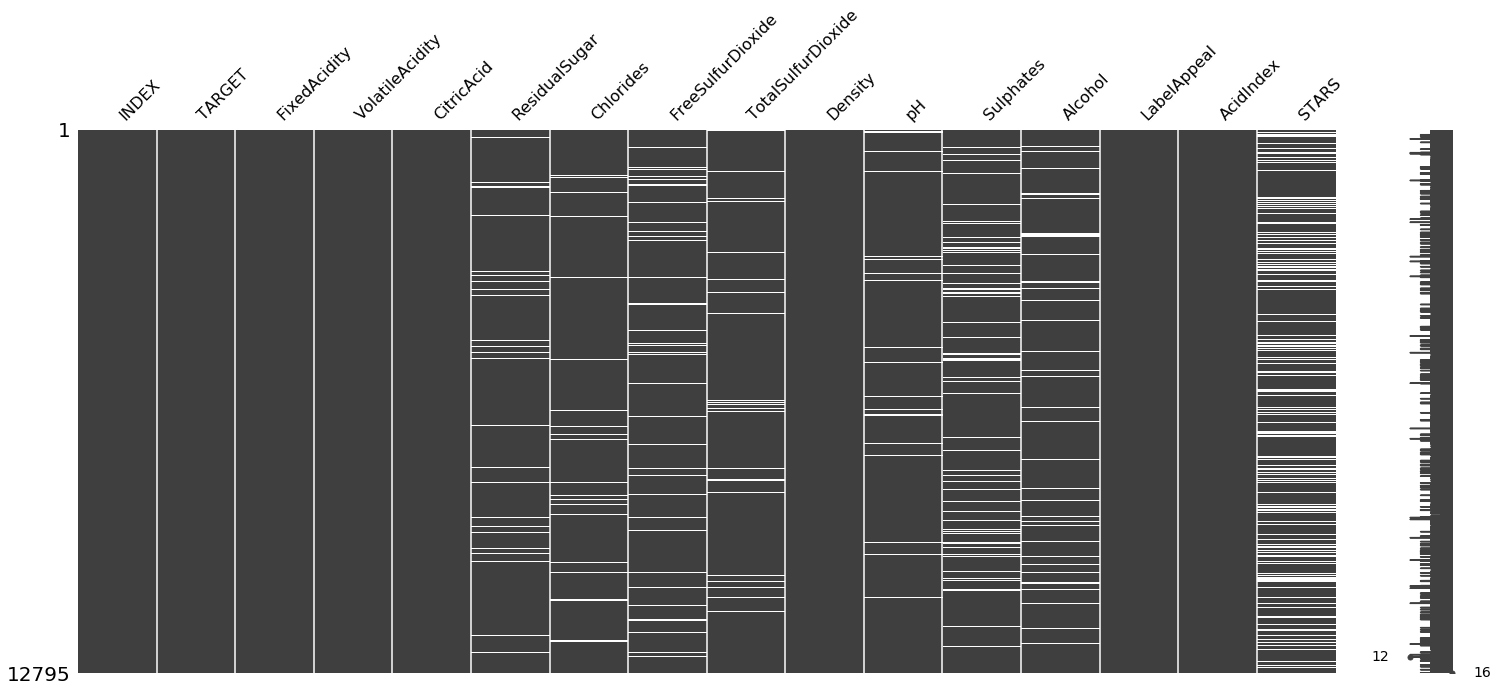

In [122]:
msno.matrix(df)

The white lines indicate where the values are null. The values are scattered around and we don't see any real patterns.

<hr>

These steps are important for us - We've shown that the null values are occuring <i>randomly</i> in our data. By random I mean there are no places where nulls occur together. This does NOT mean that there is no domain reason why the nulls have no value. We will evaluate whether our nulls could provide us any information once we better understand our features.  

Now let's look at the individual distributions. We are going to do this one feature at a time so that we can also pay attention to the scale of each graph and focus in and what each variable could possibly add to our model. 

In [123]:
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


The index column is meaningless for us since it is just an autoincrementing number.
The Target variable (wine cases sold) has a high std. Let's see what this looks like. 

From above, we know that our target variable is a discrete integer. 

<BarContainer object of 9 artists>

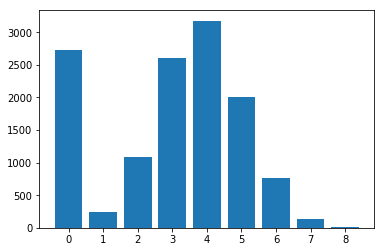

In [124]:
value_counts = df.TARGET.value_counts()
counts = value_counts.values
labels = value_counts.index
plt.bar(x = labels, height = counts, tick_label = labels)

We see that for our target variable, if you take out the wines that sold 0 cases, the distribution is approximately normal.
From this, it seems like wines that didn't sell might have some feature that prevents them from selling. Let's split our dataset and see if any of the distributions of the features change when there are 0 cases sold. 

In [127]:
dfWithNoneSold = df[df.TARGET == 0]
dfWithSold = df[~(df.TARGET == 0)]
assert len(dfWithSold) + len(dfWithNoneSold) == len(df)

In [130]:
#Just to validate the length
print(len(dfWithNoneSold))
print(len(dfWithSold))


2734
10061


We can see that a large number of wines had 0 sold.

Now let's see the overall distributions of our features; both with our split above and overall.

In [131]:
df.columns.values

array(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide',
       'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol',
       'LabelAppeal', 'AcidIndex', 'STARS'], dtype=object)

### Fixed Acidity

There are different types of acid in wines. In our dataset we have 2 <i>distinct</i> types.

1. Titratable Acids - These are acids that can be neutralized by adding a base. FixedAcidity refers to the acid that is titratable.
2. Volatile Acidity - This refers to a  different type of acidity that comes about through fermentation by spoilage organisms. It can be measured through  steam distillation.

In a practical sense, the wine consumer is interested in the Total Acidity. Wines without enough acid tend to be flat. Too much acid would make it taste tart. One feature variable that might be interesting would be the fixed acidity + the volatile acidity since these variables are additive. 

In our dataset, we won't need to engineer a new feature by adding up the acidity. Our 'AcidIndex' feature, is a weighted average of the total acidity. We should however, verify this. We won't be able to just add the variables since we aren't given the units. We therefore will relook at the acid variables after doing our cleaning steps and rescale the variables.

For more info see http://winemakersacademy.com/understanding-wine-acidity/.

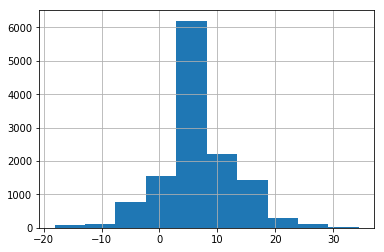

In [132]:
df.FixedAcidity.hist()

The fixed acidity (titratable acid) looks like a normal distribution but it has a very high peak. We can use a qq plot to check. We plot the quantiles from what would be a normal distribution against the distribution of the feature under test.

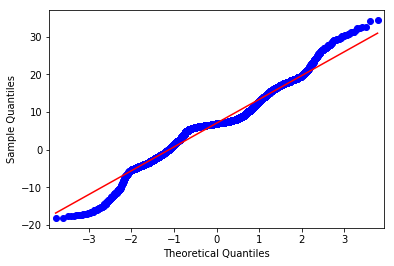

In [133]:
import statsmodels.api as sm
import pylab
sm.qqplot(df.FixedAcidity, loc = df.FixedAcidity.mean(), scale = df.FixedAcidity.std(), line='s')
pylab.show()

The tails of the graph definitly don't match up with what it would be if the distribution was normal. This is probably because the center is very narrow and there are many points far away from the center. Let's look at this another way with a box plot.

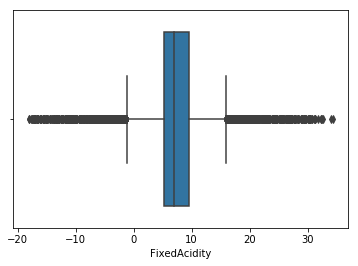

In [134]:
import seaborn as sns
sns.boxplot(df.FixedAcidity)

We can tell that there are many outliers on each side.

Let's see if the distribution changes if we look at the graph with none sold.

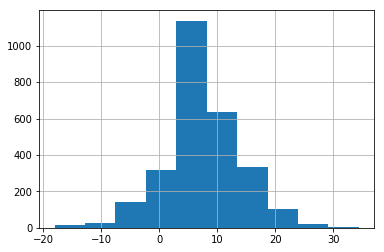

In [135]:
dfWithNoneSold.FixedAcidity.hist()

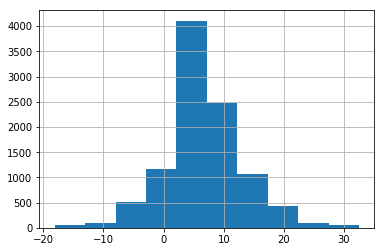

In [136]:
dfWithSold.FixedAcidity.hist()

There is no apparent difference between both of these graphs.

We have to ask here... what does it mean for FixedAcidity to be negative. It seems like this data was already transformed in some way. As mentioned before, we do not have the units this is measured in.

### Citric Acid

Citric Acid is used to add a citric taste to wine and impart freshness. Let's look at it's distribution.

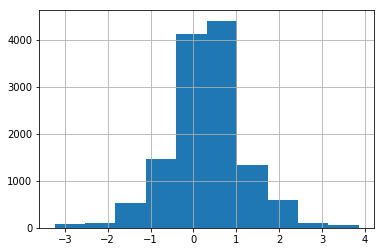

In [137]:
df.CitricAcid.hist()

We notice the distribution of citric acid is similar to fixed acidity. The distribution is normal and centered around 0.

In order to conserve space, I will not be re-graphing each distribution with the split we made above, unless there is something significant. Here once again, there is no difference between ones with 0 sold and once with at least one sold. 

### Residual Sugar

Sugar is what is used to add sweetness to wine. There is an important balance between the sweetness of the wine and the acidity of the wine. We may be interested in an interaction feature between total acidity (ie - Acid Index) and sugar. 

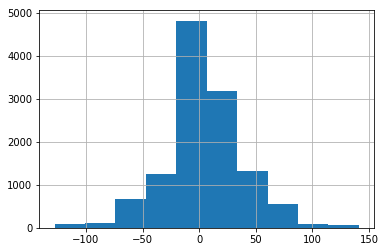

In [138]:
df.ResidualSugar.hist()

Once again we have a normal distribution, centered around 0. We have negative values making it seem like this feature also was engineered already in some way.

### Chlorides

Chlorides are another element in wine. 

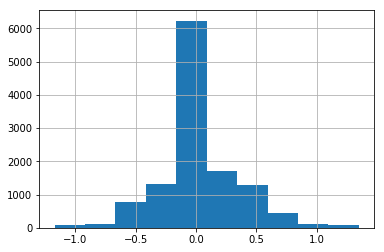

In [139]:
df.Chlorides.hist()

Liked fixed acidity, the distribution for citric acid makes a sharp peak.

We are starting to notice a trend that all of these variables make normal distributions centered around 0 with sharp peaks. The deviation here is a lot less than some of the other variables.

### FreeSulfurDioxide

Sulfur is used to keep wine fresh.

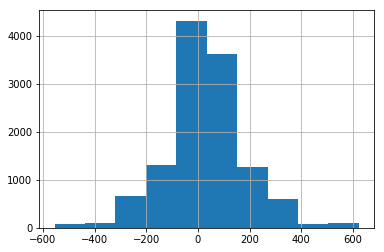

In [140]:
df.FreeSulfurDioxide.hist()

The variance for this variable is very large compared to some of the others. There are values up to around += 600. This meets the trend again of a unimodal distribution with a lot of outliers.

### Density

Density meassures the thickness of a liquid.This feature can help show the ratio between some of our features. 
As a rule of thumb- Alcohol + Sugar + Water = Density

For more info see https://www.chemwine.com/home/why-is-wine-density-important-1-sl6yl


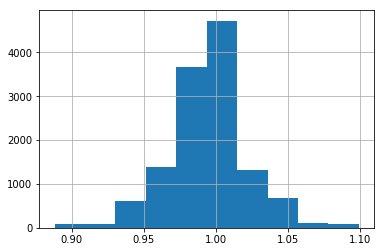

In [141]:
df.Density.hist()

The density values all hover around 1 unlike the others which are around 0. This is logical though since a density of 0 doesn't make any sense.

### PH

PH meassures the strength of the acid in a wine. The balance between the strengh of the acid and the acidity is important to keep in mind.

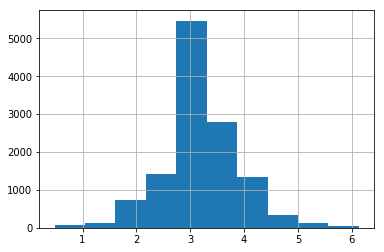

In [142]:
df.pH.hist()

We see that most wines have a low ph. Some of these ph's seem dangerously low though... Let's explore this a bit further.

In [143]:
lowph = df[df.pH <= 2]
len(lowph)

499

499 wines have a ph of 2

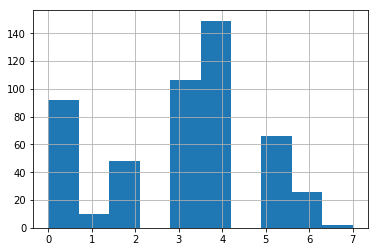

In [144]:
lowph.TARGET.hist()

Interestingly,  the distribution of the target variable does not seem to change so much for a low ph.(granted there are only ~500 samples.)

### Sulphates

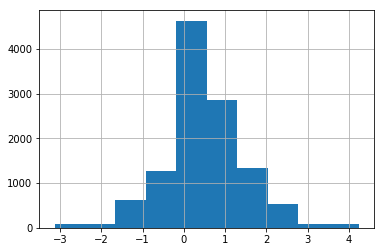

In [145]:
df.Sulphates.hist()

Once again, we see a distribution centered around 0

### Alcohol

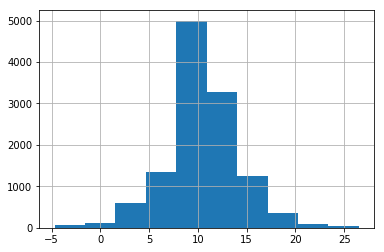

In [146]:
df.Alcohol.hist()

Here we see the alcohol content. This is normally distributed too. We can guess here the units are percentages. (Again though, how can a percentage be negative?) 

### Label Appeal

This feature is much different than the other variables in that it does not measure the quantity of anything in the wine, but rather the appeal the label on the bottle has. This feature may be particularly important in evaluating how well a bottle sells.

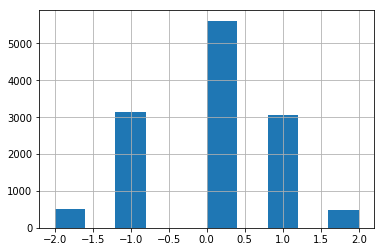

In [147]:
df.LabelAppeal.hist()

This is a discrete normal distribution.

### Acid Index

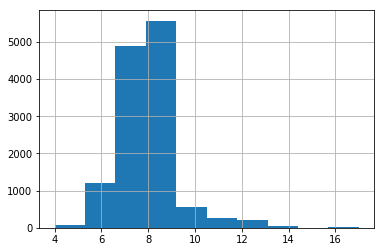

In [148]:
df.AcidIndex.hist()

This distribution is a bit different than the others in that it seems to be a bit more righly skewed. Remember though - acid index is a composite of some of our features. 

### STARS

STARS gives the rating wine experts gave on wine. We already saw that a lot of these values are null. 

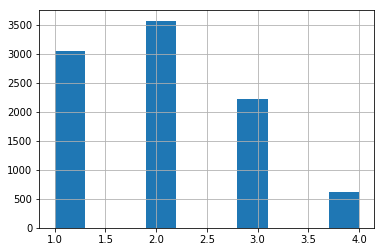

In [149]:
df.STARS.hist()

The distribution of rating is discrete. Most wines are rated poorly (1 or 2). The rest are rated medium or high (3 or 4).

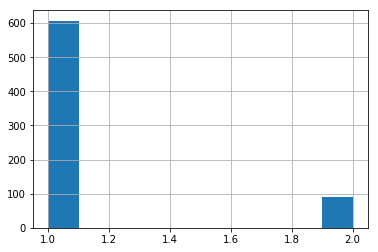

In [150]:
dfWithNoneSold.STARS.hist()

With this variable we notice a significant difference in the ratings with none sold. (albeit again the low sample size).Among the ones with none sold, all the ratings were either a 1 or 2. 

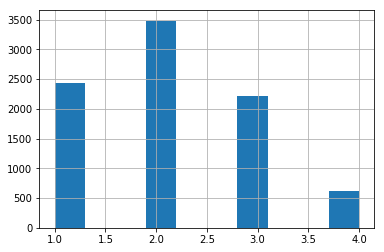

In [151]:
dfWithSold.STARS.hist()

The ones that had sold though follow the same distribution.

<hr>

This piece of the analysis is significant. We just discovered that the ratings which are null are more likely to be part of the group that did not sell any.

Let's calculate a stat to try to prove this.

In [159]:
nullRatings = df[df.STARS.isnull()]

In [160]:
counts = nullRatings.TARGET.value_counts()
counts

0    2038
3     457
2     335
4     260
1     126
5     101
6      32
7       8
8       2
Name: TARGET, dtype: int64

In [161]:
counts[0]/len(dfWithNoneSold)

0.745427944403804

A whopping .745 percent of our data with no ratings had 0 cases sold!

It is particularly important that we do NOT drop these values from our dataset.

<hr>

### Correlations

We should look to see if we can find any correlations. We may not find anything significant simply because all of our variables are being meassured on different scales. Remember, some of our variables are calculated ratios between other variables (ex - fixed acididty and density)

In [162]:
import seaborn as sns

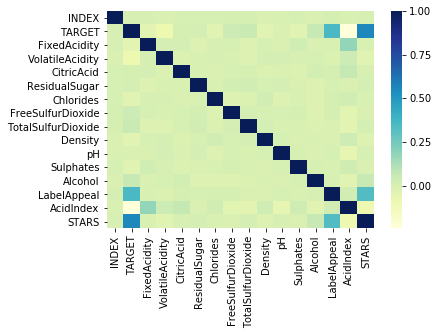

In [163]:
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

In this heatmap, the darker the color, the higher the correlation. We see the correlation that we found earlier in our eda between number of cases sold (TARGET) and STARS is particularly high. Our analysis was slightly limited over there to focus on null values. Here we see the non nulls are also related. Our target variable also has a not insignificant relationship with label appeal, although label appeal itself is related to STARS. The other variables seem to be independent.

Let's also try to see if there is any relationship between Sulphate being null and the target variable since a high number of sulphates were null.

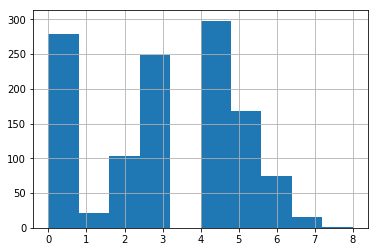

In [164]:
nullSulphates = df[df.Sulphates.isnull()]
nullSulphates.TARGET.hist()

We see no apparent difference in the number of cases sold. Now let's see if there is any correlation between any attributes where these are null.

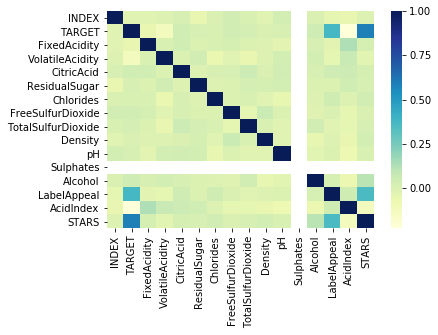

In [165]:
corr = nullSulphates.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

We don't see any new correlations in this narrowed down set.

### Conclusions from our eda work and next steps. 

1. Most of our variables have pdfs that are approximately normal, although they have higher peaks and more outliers. For some of them, it seems like the variables were already processed in some way to make them normal.
2. Some of our variables have values that are nonsensical. It is hard to see exactly what the given numbers represent because there are no units given. We saw some negative values for features that are measuring the content of something in the wine, which inherently can't be negative. I'm not really sure if all machine learning models can deal with negatives and I think I should get rid of them just in case. A simply way to do this would be to add a constant as that would not change the distribution; only shift it over. I do not think that negatives are meaningless for us just they were scaled improperly.
3. Our variables are measured on different scales. This in some sense limits our EDA because we couldn't add features together.
4. We did not see any apparent pattern in where nulls occur together. Most of the features with nulls comprise of under 5 percent of the data. At the same time there is a strong relationship between STARS which has close to 2700 null values and the Target variable (number of cases sold) being 0. For the variables that compose of under 10 percent of our data, because they form somewhat normal distribution, we would not be adding that much noise by simply imputing with the median. According to the feature engineering book this is fine to do up to ~20 percent of the data and this is half of that. For STARS, we should fill in null variables with an indicator variables. We should be sure to check that our distributions don't change after imputing the data.
5. We should also think about how we can incorporate new features. Since we know that acid index creates a tangible difference in the taste in the wine as it measures the total acidity, we should bin outliers into groups of very high acid index, normal acid index, and low acid index. We also should incorporate a feature that measures the ratio between sugar and acid since that also dramatically can change how sweet or tart a wine tastes.  


### Data Cleaning

Let's start with a new dataframe (without the index column as that does not add any info) and get rid of all the negatives.
We can do this by adding the min value of each feature to each row. 

In [166]:
df.columns

Index(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

In [167]:
cleaningDf = df.copy().drop(['TARGET', 'INDEX'], axis = 1)

In [168]:

for col in cleaningDf.columns:
    _min = cleaningDf[col].min()
    if(_min < 0):
        print(_min, col)
        cleaningDf[col] = cleaningDf[col].apply(lambda x: x + (_min * -1) + 1)


-18.1 FixedAcidity
-2.79 VolatileAcidity
-3.24 CitricAcid
-127.8 ResidualSugar
-1.171 Chlorides
-555.0 FreeSulfurDioxide
-823.0 TotalSulfurDioxide
-3.13 Sulphates
-4.7 Alcohol
-2 LabelAppeal


In [169]:
# let's just verify...
print("pre state:")
df.describe()

pre state:


,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [170]:
print("post state:")
cleaningDf.describe()

post state:


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,26.175717,4.114104,4.548413,134.218733,2.225822,586.845571,944.714233,0.994203,3.207628,4.657112,16.189236,2.990934,7.772724,2.041755
std,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.888090,0.480000,1.000000,1.000000,1.000000,4.000000,1.000000
25%,24.300000,3.920000,4.270000,126.800000,2.140000,556.000000,851.000000,0.987720,2.960000,4.410000,14.700000,2.000000,7.000000,1.000000
50%,26.000000,4.070000,4.550000,132.700000,2.217000,586.000000,947.000000,0.994490,3.200000,4.630000,16.100000,3.000000,8.000000,2.000000
75%,28.600000,4.430000,4.820000,144.700000,2.324000,626.000000,1032.000000,1.000515,3.470000,4.990000,18.100000,4.000000,8.000000,3.000000
max,53.500000,7.470000,8.100000,269.950000,3.522000,1179.000000,1881.000000,1.099240,6.130000,8.370000,32.200000,5.000000,17.000000,4.000000


We see that the rows with negative values now all have a min of 0. All this really did was shift our distributions right.

In [171]:
cleaningDf2 = cleaningDf.copy()


Now let's scale our variables with Min max scaling. (this makes the last step we did redundant, however the code will allow us to change the way we are scaling if we notice any problems later.) This will put our variables on the same scale so they all will have equal weight. One thing we need to pay attention to are the outliers. We have already seen that the particularly high values may give thresholds that can change the taste of the wine. 

In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
scaler = MinMaxScaler(copy=True)
cleaningDf3 = pd.DataFrame(scaler.fit_transform(cleaningDf2), columns = cleaningDf2.columns)
cleaningDf3.STARS = cleaningDf2.STARS #since our data set is small it is fine to just undo setting these values. These are categorical values really since they are ratings. 
cleaningDf3.LabelAppeal = cleaningDf2.LabelAppeal

Now let's deal with the nulls.

In [174]:
cleaningDf3.isnull().sum(axis=0)/len(df)

FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
ResidualSugar         0.048144
Chlorides             0.049863
FreeSulfurDioxide     0.050567
TotalSulfurDioxide    0.053302
Density               0.000000
pH                    0.030871
Sulphates             0.094568
Alcohol               0.051036
LabelAppeal           0.000000
AcidIndex             0.000000
STARS                 0.262524
dtype: float64

We are simply going to impute the variables which have under ~ 6 percent missing with the median. We use the median, because we know that there are many outliers from how wide the graphs were. This really should be mitigated slightly because we have already applied min max scaling.

In [175]:
counts = cleaningDf3.isnull().sum(axis=0)/len(df)
imputeWithMedianThreshold = .11

for col, percentNull in counts.iteritems():
    if percentNull <= imputeWithMedianThreshold and percentNull > 0:
        med = cleaningDf3[col].median()
        print(col, med)
        nulls = cleaningDf3[cleaningDf3[col].isnull()]
        cleaningDf3.loc[nulls.index, col] = med
        
    

ResidualSugar 0.4896820970440602
Chlorides 0.48255352894528153
FreeSulfurDioxide 0.49660441426146007
TotalSulfurDioxide 0.5031914893617021
pH 0.4814159292035398
Sulphates 0.49253731343283574
Alcohol 0.48397435897435903


In [176]:
#TO validate
cleaningDf3.isnull().sum(axis=0)/len(df)

FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
ResidualSugar         0.000000
Chlorides             0.000000
FreeSulfurDioxide     0.000000
TotalSulfurDioxide    0.000000
Density               0.000000
pH                    0.000000
Sulphates             0.000000
Alcohol               0.000000
LabelAppeal           0.000000
AcidIndex             0.000000
STARS                 0.262524
dtype: float64

Now let's mark STARS with an indicator variable since we know those values are important as discussed earlier. It is natural here that a 0 should indicate no review.

In [177]:
cleaningDf3.STARS.value_counts()

2.0    3570
1.0    3042
3.0    2212
4.0     612
Name: STARS, dtype: int64

In [178]:
nulls = cleaningDf3[cleaningDf3.STARS.isnull()]
cleaningDf3.loc[nulls.index, 'STARS'] = 0

In [179]:
cleaningDf3.isnull().sum(axis=0)/len(df)

FixedAcidity          0.0
VolatileAcidity       0.0
CitricAcid            0.0
ResidualSugar         0.0
Chlorides             0.0
FreeSulfurDioxide     0.0
TotalSulfurDioxide    0.0
Density               0.0
pH                    0.0
Sulphates             0.0
Alcohol               0.0
LabelAppeal           0.0
AcidIndex             0.0
STARS                 0.0
dtype: float64

Great! we cleaned up all the nulls.

Let's now build 2 variables.
1. The ratio of sugar to to acid index as the can meassure the sweetness/tartness of the wine. 
2. Bin the wines which have a high acid index.

In [180]:
cleaningDf3['AcidToSugarRatio'] = cleaningDf3.FixedAcidity/cleaningDf3.ResidualSugar

In [181]:
std = cleaningDf3.AcidIndex.std()
mean = cleaningDf3.AcidIndex.mean()

def dev(x, mean, std):
    return (x - mean)/std
    
cleaningDf3['AcidBins'] = cleaningDf3.AcidIndex.apply(lambda x: 0 if dev(x,mean,std) < -2 else 2 if dev(x, mean, std) > 2 else 1  )

In [182]:
cleaningDf3.AcidBins.value_counts()

1    12195
2      522
0       78
Name: AcidBins, dtype: int64

We see from this that around 522 have a deviation above 2 which isn't as many as we may have expected... This is a very sparse column and this probably wasn't a good idea. Let's widen the range a bit.

In [183]:
cleaningDf3['AcidBins'] = cleaningDf3.AcidIndex.apply(lambda x: 0 if dev(x,mean,std) < -1.0 else 2 if dev(x, mean, std) > 1.0 else 1  )

In [184]:
cleaningDf3.AcidBins.value_counts()

1    10447
0     1275
2     1073
Name: AcidBins, dtype: int64

This is better. 0 is a low acid,1 is normal, 2 is high.

Note that we do not want to use one hot encoding for this variable or STARS or LabelAppeal because these have an ordering to them. We would lose that data by splitting them. We don't need to use an Ordinal Encoder https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.preprocessing.ordinalencoder/ because our data is already ordered as integers.

## EDA Revisiting

Let's now revisit our eda.

In [185]:
cleanedData = cleaningDf3

In [186]:
cleanedData.isnull().any()

FixedAcidity          False
VolatileAcidity       False
CitricAcid            False
ResidualSugar         False
Chlorides             False
FreeSulfurDioxide     False
TotalSulfurDioxide    False
Density               False
pH                    False
Sulphates             False
Alcohol               False
LabelAppeal           False
AcidIndex             False
STARS                 False
AcidToSugarRatio      False
AcidBins              False
dtype: bool

Our data now has no nulls.

Let's now compare our distributions.

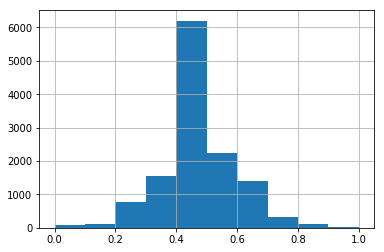

In [187]:
cleanedData.FixedAcidity.hist()

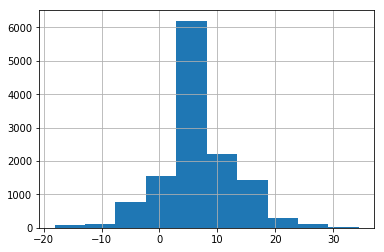

In [188]:
df.FixedAcidity.hist()

In [189]:
Our fixed acidity follows the same distribution. Our outliers remain intact.

SyntaxError: invalid syntax (<ipython-input-189-8896615fe6b3>, line 1)

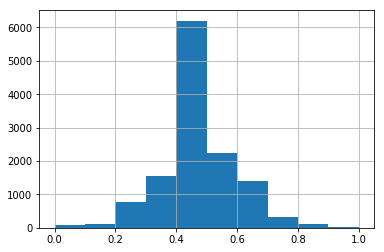

In [190]:
cleanedData.FixedAcidity.hist()


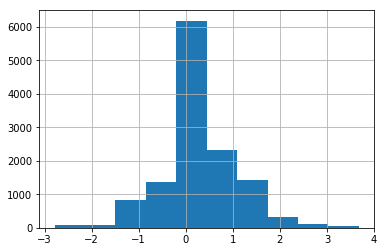

In [191]:
df.VolatileAcidity.hist()

Volatile Acidity looks the same.

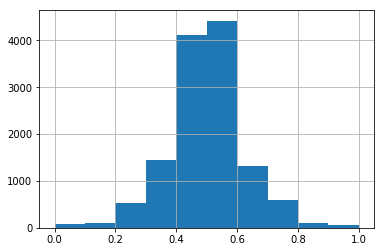

In [192]:
cleanedData.CitricAcid.hist()

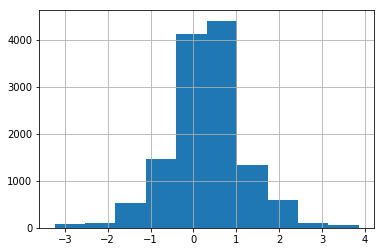

In [193]:
df.CitricAcid.hist()

Citric Acid follows the same distribution. 

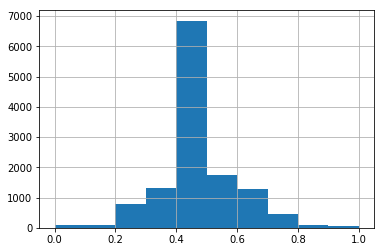

In [194]:
cleanedData.Chlorides.hist()

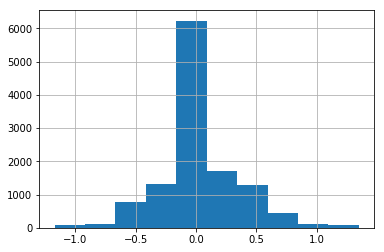

In [195]:
df.Chlorides.hist()

Chlorides follow the same distribution.

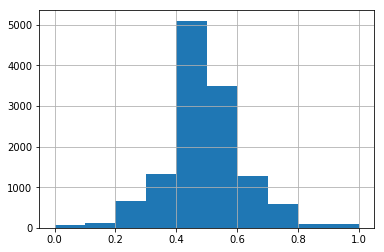

In [196]:
cleanedData.FreeSulfurDioxide.hist()

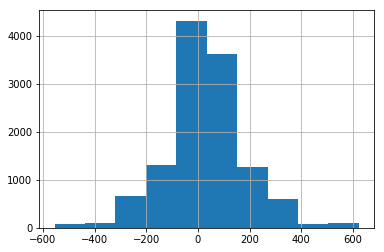

In [197]:
df.FreeSulfurDioxide.hist()

The distribution for free sulfur dioxide looks slightly different, but not significantly. (this would be hard to tell if we just plotted them all at once)

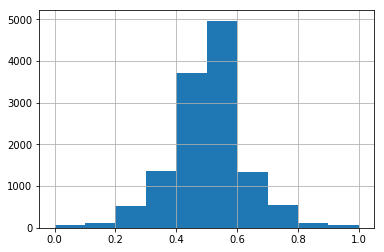

In [198]:
cleanedData.TotalSulfurDioxide.hist()

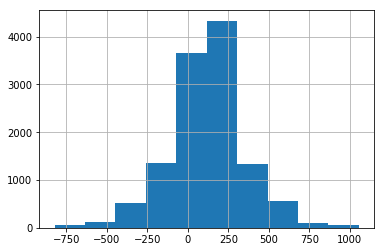

In [199]:
df.TotalSulfurDioxide.hist()

This distribution also looks slightly different but because it is so close it is fine.

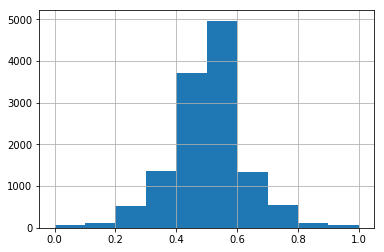

In [200]:
cleanedData.TotalSulfurDioxide.hist()

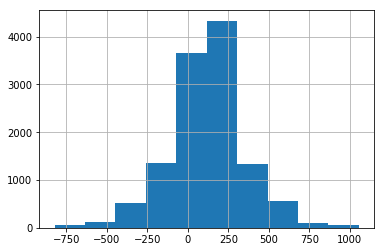

In [201]:
df.TotalSulfurDioxide.hist()

We see the same difference with sulfur dioxide.

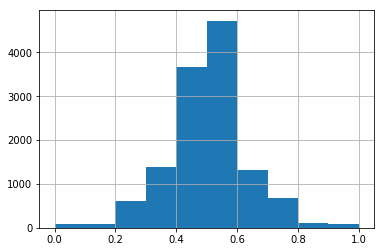

In [202]:
cleanedData.Density.hist()

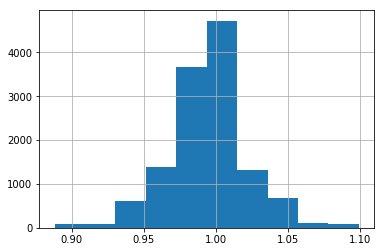

In [203]:
df.Density.hist()

Density has nearly identical distributions.

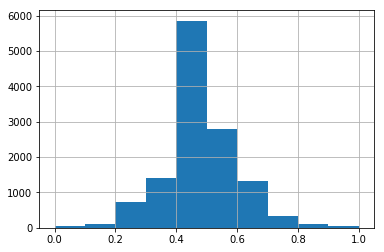

In [204]:
cleanedData.pH.hist()

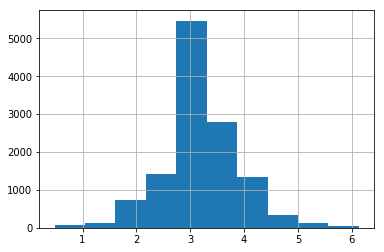

In [205]:
df.pH.hist()

ph has the same distribution.

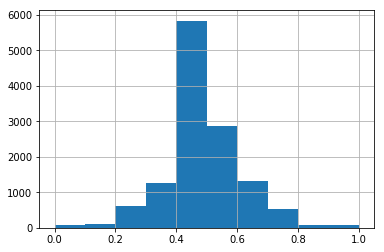

In [206]:
cleanedData.Sulphates.hist()

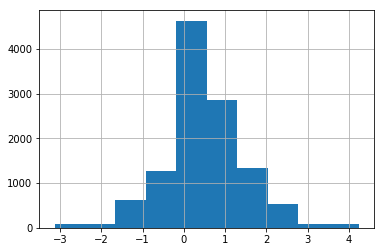

In [207]:
df.Sulphates.hist()

sulphates also has the same distribution.

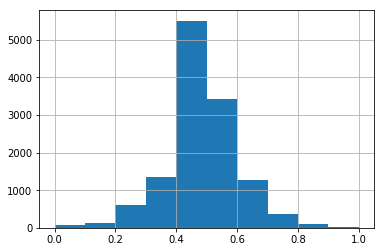

In [208]:
cleanedData.Alcohol.hist()

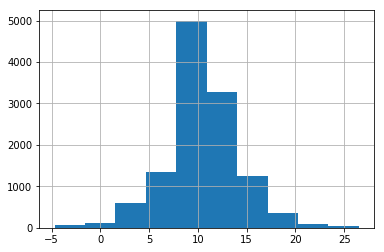

In [209]:
df.Alcohol.hist()

Alchohol has the same distribution.

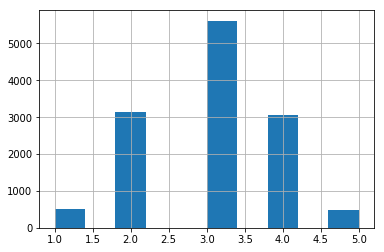

In [210]:
cleanedData.LabelAppeal.hist()

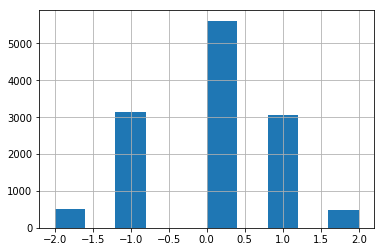

In [211]:
df.LabelAppeal.hist()

Label appeal has the same distribution.

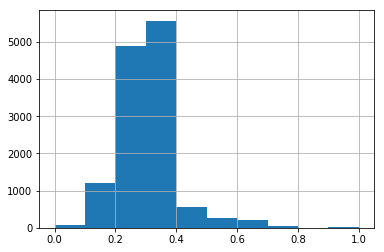

In [212]:
cleanedData.AcidIndex.hist()

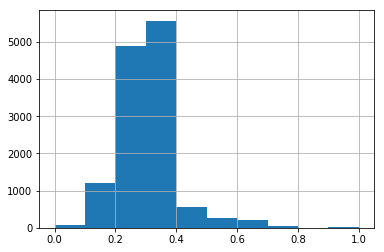

In [213]:
cleanedData.AcidIndex.hist()

Acid index has the same distribution.

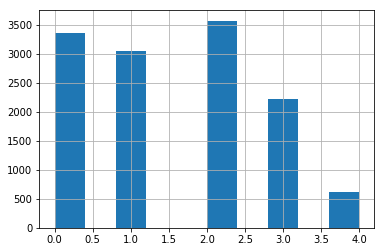

In [214]:
cleanedData.STARS.hist()

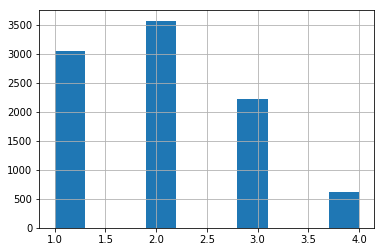

In [215]:
df.STARS.hist()

Stars has a slightly different distribution. This is because we filled in the null values with 0. We should notice an increase in our correlations now. Let's look

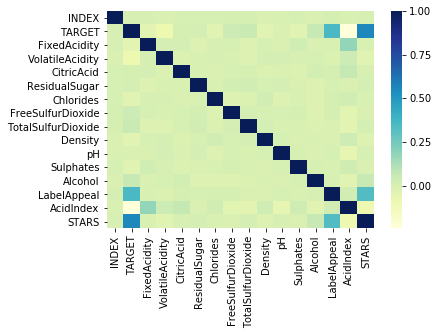

In [216]:
#First our original
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

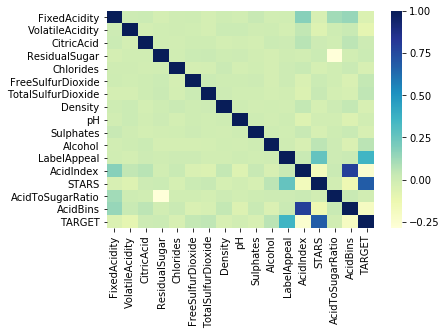

In [217]:
#Now our final
cleanedData["TARGET"] = df["TARGET"]

corr = cleanedData.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

We see a strong correlation between acid bins and acid index. This makes sense since acid bin was derived from acid index. Stars still has a relationship with acid index and number of cases sold (target) with Stars This relationship now, indeed is a lot stronger after filling the values in the nulls with 0.

Let's do a test to see if acid index really is the sum of the 2 types of acids

In [218]:
testAcidIndex = (cleanedData.FixedAcidity + cleanedData.VolatileAcidity)/2

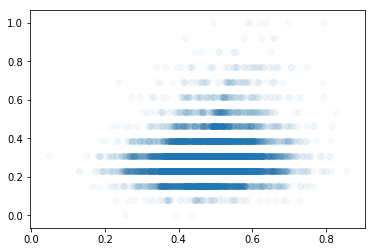

In [219]:
plt.scatter(testAcidIndex, cleanedData.AcidIndex, alpha = .03)

This doesn't seem to be completely true. The general trend is true that the more test acid, the more volatile acidity but there is a wide variance. Part of the problem may be that we don't really know how this acid index variable was calculated or if they are using extra features. These variables don't really seem additive and I'm hesitant to make a feature to add them considering that we are already given acid index.

### What we Accomplished

1. We were able to clean nulls from a dataset where over 60 percent of the rows had at least 1 null without changing the distribution
2. We saw a strong correlation between STARS, and number of boxes sold. This relationship grew stronger after adding 0 to all the null STAR records. 
3. We scaled all the columns so that all the records are between 0 and 1 (except the categorical) while keeping the outliers. 
4. We created 2 new features, the ratio of acid to sugar, and a binning of wines with extremly high acid content which can taste dramatically different.